# Test three image alpha blend

In [1]:
import math
import numpy as np

# Import DiskFind utilities for PredatorEye.
import sys
sys.path.append('/content/drive/My Drive/PredatorEye/shared_code/')
import DiskFind as df

df.set_global_random_seed(20220113)

df.relative_disk_radius() = 0.09814453125
image_size = 128
disk_radius = 12.5625
disk_radius_int = 13
matte.shape = (26, 26, 1)


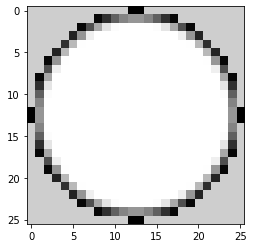

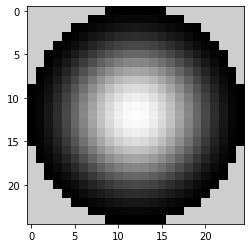

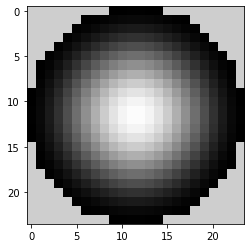

In [24]:
# See SO question "Numpy - multiple 3d array with a 2d array"
#     Based on this SO answer: https://stackoverflow.com/a/46930388/1991373
#     See also about np.tensordot: https://stackoverflow.com/a/46930585/1991373

print('df.relative_disk_radius() =', df.relative_disk_radius())

image_depth = 3
image_size = 128
# image_size = 3
# image_size = 32
disk_radius = image_size * df.relative_disk_radius()
disk_radius_int = round(disk_radius)
disk_diameter_int = disk_radius_int * 2
image_shape = (image_size, image_size, image_depth)
disk_shape = (disk_diameter_int, disk_diameter_int, image_depth)
disk_matte_shape = (disk_diameter_int, disk_diameter_int, 1)

print('image_size =', image_size)
print('disk_radius =', disk_radius)
print('disk_radius_int =', disk_radius_int)

# matte = np.ones(disk_matte_shape, dtype=np.float32)
matte = np.zeros(disk_matte_shape, dtype=np.float32)
print('matte.shape =', matte.shape)


# Draw soft-eged disk with given centerpoint and color.
# (Copied from Find_3_disks)
# def draw_disk(center, color):
def draw_disk(center, color, image):
    cx = int(center[0])
    cy = int(center[1])
    dr = int(disk_radius)

    # TODO temp for debugging
    color = np.array(color)
    bg_color = np.zeros(color.shape)

    # What is the correct way to do this?
    for y in range(disk_diameter_int):
        for x in range(disk_diameter_int):
            image[x, y, :] = [0.81]


    for x in range(cx - dr, cx + dr + 1):
        for y in range(cy - dr, cy + dr + 1):
            d = math.sqrt(math.pow(x - cx, 2) + math.pow(y - cy, 2))
            if (d <= dr):
                blend = df.spot_utility((x, y), center, dr * 0.85, dr)
                # print((x, y),
                #       'cx =', cx, 'cy =', cy,
                #       'd =', d, 'dr =', dr,
                #       'blend =', blend,
                #       'color =', color, 'bg_color =', bg_color,
                #       'interpolated = ', df.interpolate(blend, bg_color, color))                
                image[x, y, :] = df.interpolate(blend, bg_color, color) 
    # print_matte(image)
    return image

def print_matte(image):
    for y in range(disk_diameter_int):
        line = ''
        for x in range(disk_diameter_int):
            s = '   ' +str(int(image[x, y][0] * 99))
            line += s[-2:] + ' '
        print(line)


# ###################
# A = matte
# # First you can reshape A in a way that its fibers (or depth vectors A[:,:,i]) will be placed as columns in matrix C:
# # C = A.reshape(x*y,3).T
# C = A.reshape(x*y,3).T
# #Then using a simple matrix multiplication you can do:
# D = numpy.dot(B,C)
# #Finally bring the result back to the original dimensions:
# D.T.reshape([x,y,3])

# # What is the correct way to do this?
# for y in range(disk_diameter_int):
#     for x in range(disk_diameter_int):
#         # matte[x, y, :] = [0.5]
#         matte[x, y, :] = [0.81]

# rgb_tensor = np.concatenate((matte, matte, matte), axis=2)
# df.draw_image(rgb_tensor)

# ###################





# matte = draw_disk((disk_radius_int, disk_radius_int), [1.0], matte)
# # rgb_tensor = np.concatenate((matte, matte, matte), axis=2)
# # df.draw_image(rgb_tensor)
# df.draw_image(np.concatenate((matte, matte, matte), axis=2))

# Draw soft-eged disk with given centerpoint and color.
# (Copied from Find_3_disks)
# def draw_disk(center, color):


# print('1 + 0.5 =', 1 + 0.5)

# # Generate a soft disk matte, an array with shape (diameter, diameter, 1).
# # Uses the TexSyn Spot parameters: inner_radius and outer_radius.
# # TODO can outer_radius always be (diameter / 2.0)?
# def make_disk_matte(diameter, inner_radius, outer_radius):

#     # Coerce diameter to be int, to be used as an index for pixels.
#     diameter = round(diameter)

#     # Make the array to return.
#     image = np.zeros((diameter, diameter, 1), dtype=np.float32)

#     # TODO temp for debugging
#     # What is the correct way to do this?
#     for y in range(diameter):
#         for x in range(diameter):
#             image[x, y, :] = [0.81]

#     center = (diameter / 2.0, diameter / 2.0)

#     # TODO temp for debugging
#     # color = np.array(color)
#     # bg_color = np.zeros(color.shape)
#     color = np.array([1.0])
#     bg_color = np.zeros(color.shape)

#     # for x in range(cx - dr, cx + dr + 1):
#     #     for y in range(cy - dr, cy + dr + 1):
#     for xi in range(diameter):
#         xf = xi + 0.5
#         for yi in range(diameter):
#             yf = yi + 0.5
#             # d = math.sqrt(math.pow(x - cx, 2) + math.pow(y - cy, 2))
#             # d = math.sqrt(math.pow(xi - cx, 2) + math.pow(yi - cy, 2))
#             d = math.sqrt(math.pow(xf - center[0], 2) +
#                           math.pow(yf - center[1], 2))
#             # if (d <= dr):
#             if (d <= outer_radius):
#                 # blend = df.spot_utility((x, y), center, dr * 0.85, dr)
#                 # blend = df.spot_utility((xi, yi), center, inner_radius, outer_radius)
#                 blend = df.spot_utility((xf, yf), center, inner_radius, outer_radius)
#                 # image[x, y, :] = df.interpolate(blend, bg_color, color) 
#                 image[xi, yi, :] = df.interpolate(blend, bg_color, color) 
#     return image

# # Generate a soft disk matte, an array with shape (diameter, diameter, 1).
# # Uses the TexSyn Spot parameters: inner_radius and outer_radius.
# # TODO can outer_radius always be (diameter / 2.0)?
# def make_disk_matte(diameter, inner_radius, outer_radius):

#     # Coerce diameter to be int, to be used as an index for pixels.
#     diameter = round(diameter)

#     # Make the array to return.
#     image = np.zeros((diameter, diameter, 1), dtype=np.float32)

#     # # TODO temp for debugging
#     # # What is the correct way to do this?
#     # for y in range(diameter):
#     #     for x in range(diameter):
#     #         image[x, y, :] = [0.81]

#     # Centerpoint of disk (as float, independent of pixel boundaries).
#     cp = (diameter / 2.0, diameter / 2.0)

#     # for xi in range(diameter):
#     #     xf = xi + 0.5
#     #     for yi in range(diameter):
#     #         yf = yi + 0.5
#     #         d = math.sqrt(math.pow(xf - cp[0], 2) + math.pow(yf - cp[1], 2))
#     #         if (d <= outer_radius):
#     #             image[xi, yi, :] = df.spot_utility((xf, yf), cp,
#     #                                                inner_radius, outer_radius) 

#     for xi in range(diameter):
#         xf = xi + 0.5
#         for yi in range(diameter):
#             yf = yi + 0.5
#             # d = math.sqrt(math.pow(xf - cp[0], 2) + math.pow(yf - cp[1], 2))
#             # if (d <= outer_radius):
#             #     image[xi, yi, :] = df.spot_utility((xf, yf), cp,
#             #                                        inner_radius, outer_radius) 
#             image[xi, yi, :] = df.spot_utility((xf, yf), cp,
#                                                 inner_radius, outer_radius)
#             # TODO temp for debugging
#             d = math.sqrt(math.pow(xf - cp[0], 2) + math.pow(yf - cp[1], 2))
#             if (d > outer_radius):
#                 image[xi, yi, :] = 0.81
#     return image

# Generate a soft disk matte, an array with shape (diameter, diameter, 1).
# Uses the TexSyn Spot parameters: inner_radius and outer_radius.
# TODO can outer_radius always be (diameter / 2.0)?
def make_disk_matte(diameter, inner_radius, outer_radius):
    # Coerce diameter to be int, to be used as an index for pixels.
    diameter = round(diameter)
    # Make the array to return.
    image = np.zeros((diameter, diameter, 1), dtype=np.float32)
    # Centerpoint of disk (as float, independent of pixel boundaries).
    cp = (diameter / 2.0, diameter / 2.0)
    # Iterate over all pixels in image.
    for xi in range(diameter):
        xf = xi + 0.5
        for yi in range(diameter):
            yf = yi + 0.5
            image[xi, yi, :] = df.spot_utility((xf, yf), cp,
                                                inner_radius, outer_radius)
            # TODO temp for debugging
            d = math.sqrt(math.pow(xf - cp[0], 2) + math.pow(yf - cp[1], 2))
            if (d > outer_radius):
                image[xi, yi, :] = 0.81
    return image

matte = make_disk_matte(disk_diameter_int,
                        disk_radius * 0.85,
                        disk_radius)
df.draw_image(np.concatenate((matte, matte, matte), axis=2))

matte = make_disk_matte(25, 0, 12.5)
df.draw_image(np.concatenate((matte, matte, matte), axis=2))

matte = make_disk_matte(24, 0, 12)
df.draw_image(np.concatenate((matte, matte, matte), axis=2))
